**1) Simple linear regression**

a) data preparation (missing data)

In [1]:
# Book Figure 10-1

import pandas as pd

!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

df = pd.read_csv("FuelConsumption.csv")

df.isna().sum()
df['MODEL'].fillna(df['MODEL'].value_counts().idxmax(), inplace=True)
df.drop(['MAKE'], axis=1, inplace=True)
df.dropna(axis=0, inplace=True)
df['CYLINDERS'].fillna(df['CYLINDERS'].mean(), inplace=True)
df['ENGINESIZE'].interpolate('linear', inplace=True)

--2023-12-04 06:05:45--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.05s   

2023-12-04 06:05:45 (1.36 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



b) data preparation (standardization)

In [2]:
# Book Figure 10-2

from sklearn.preprocessing import StandardScaler
import pandas as pd

ss = StandardScaler()
cdf = df[['ENGINESIZE','CO2EMISSIONS']]
cdf_std = ss.fit_transform(cdf)
cdf_std = pd.DataFrame(cdf_std,columns=cdf.columns)
cdf_std.head()

,ENGINESIZE,CO2EMISSIONS
0,-0.951292,-0.950840
1,-0.668653,-0.556161
2,-1.304591,-1.898070
3,0.108606,-0.019397
4,0.108606,-0.193056


c) linear correlation check

Text(0, 0.5, 'Emission')

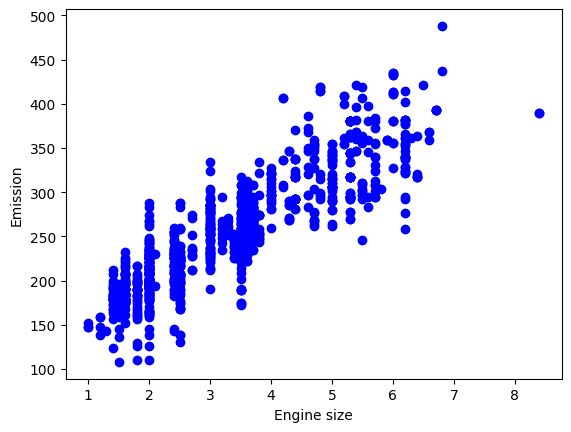

In [3]:
# Book Figure 10-3

import pandas as pd
import matplotlib.pyplot as plt

cdf = df[['ENGINESIZE','CO2EMISSIONS']]
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")

d) data split

In [52]:
# Book Figure 10-6

from sklearn.model_selection import train_test_split
import numpy as np

X = np.asarray(cdf[['ENGINESIZE']])
y = np.asarray(cdf['CO2EMISSIONS'])
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (853, 1) (853,)
Test set: (214, 1) (214,)


e) model development

In [26]:
# Book Figure 10-7

from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit (X_train, y_train)
print ('Slope: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Slope:  [39.116937]
Intercept:  125.14677575630918


f) fit a line

Text(0, 0.5, 'Emission')

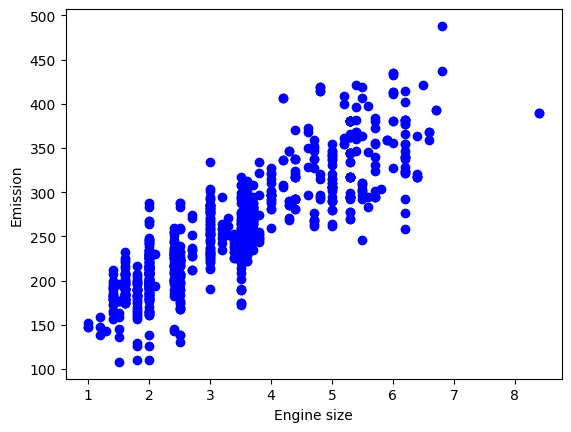

In [21]:
# Book Figure 10-9

import matplotlib.pyplot as plt

plt.scatter(X_train, y_train,  color='blue')
yhat_train = regr.predict(X_train)
plt.plot(X_train, yhat_train, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")


g) model metrics

In [7]:
# Book Figure 10-10

from sklearn.metrics import r2_score
import numpy as np

yhat_test = regr.predict(X_test)
print("Mean absolute error: %.2f" % np.mean(np.absolute(yhat_test - y_test)))
print("Mean sum of squares (MSE): %.2f" % np.mean((yhat_test - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test , yhat_test) )

Mean absolute error: 19.98
Mean sum of squares (MSE): 687.19
R2-score: 0.81


h) more metrics

In [13]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     935.0
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           1.15e-79
Time:                        06:21:53   Log-Likelihood:                -1002.5
No. Observations:                 214   AIC:                             2009.
Df Residuals:                     212   BIC:                             2016.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        125.9650      4.674     26.949      0.0

i) model validation

Intercept:  46.9076882426067 Slope:  0.814525205606948
R2-score: 0.82
Intercept:  0 Slope:  [0.98680395]
R2-score: 0.78


<ipython-input-58-e1462516c1a9>:16: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c, _, _, _ = np.linalg.lstsq(y_test2,yhat_test)


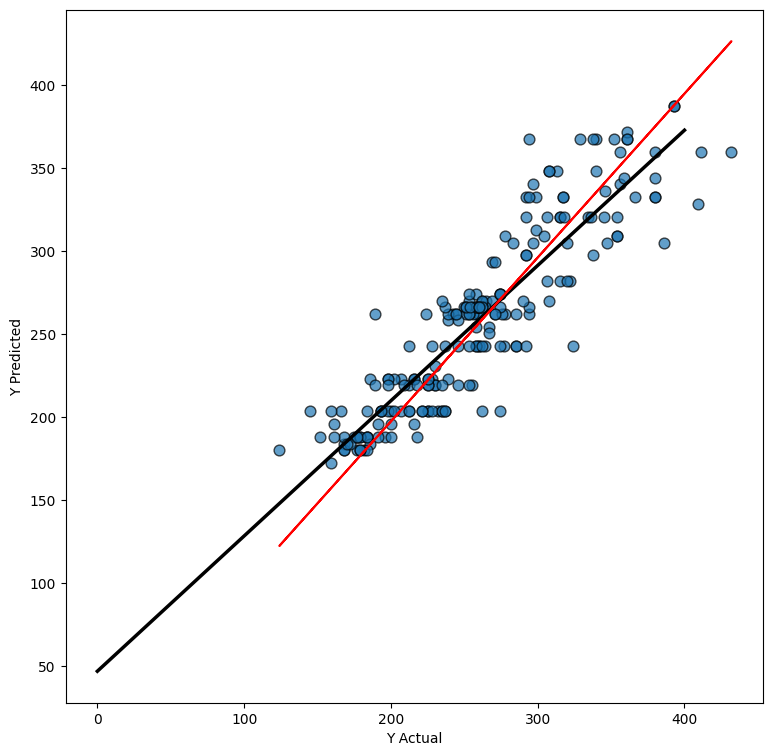

Predicted vs Actual: TtestResult(statistic=0.16400846391058638, pvalue=0.8698022653117469, df=426.0)


In [58]:
import scipy.stats as stats
from scipy.stats import f_oneway

fig, ax = plt.subplots(figsize = (9, 9))
ax.scatter(y_test , yhat_test, s=60, alpha=0.7, edgecolors="k")
plt.xlabel("Y Actual")
plt.ylabel("Y Predicted")
b, a = np.polyfit(y_test , yhat_test, deg=1)

xseq = np.linspace(0, 400, num=100)
print("Intercept: ",a,"Slope: ",b)
ax.plot(xseq, a + b * xseq, color="k", lw=2.5);
print("R2-score: %.2f" % r2_score(yhat_test , a+b*y_test) )

y_test2 = y_test[:,np.newaxis]
c, _, _, _ = np.linalg.lstsq(y_test2,yhat_test)
plt.plot(y_test2, c*y_test, 'r-')
print("Intercept: ",0,"Slope: ",c)
print("R2-score: %.2f" % r2_score(yhat_test , c*y_test) )
plt.show()

#two sample t-test (unpaired)
print('Predicted vs Actual:', stats.ttest_ind(y_test , yhat_test,equal_var=True))


**2) Multiple regression**

In [ ]:
# Book Figure 10-11

import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

X = np.asarray(df[['ENGINESIZE','FUELCONSUMPTION_COMB','CYLINDERS']])
y = np.asarray(df['CO2EMISSIONS'])
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

regr = linear_model.LinearRegression()
regr.fit (X_train, y_train)
print ('Coefficient: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

yhat_test= regr.predict(X_test)
print("Mean absolute error: %.2f" % np.mean(np.absolute(yhat_test - y_test)))
print("Mean sum of squares (MSE): %.2f" % np.mean((yhat_test - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test , yhat_test) )

a) stepwise regression

In [ ]:
# Book Figure 10-12

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

lr = LinearRegression()
sfs = SFS(lr,k_features=3,forward=True, scoring='r2', cv=None)
sfs = sfs.fit(X_train, y_train)

X_train_sfs = sfs.transform(X_train)
X_test_sfs = sfs.transform(X_test)

lr.fit(X_train_sfs, y_train)
y_pred = lr.predict(X_test_sfs)

k = len(sfs.k_feature_names_)
n = X_train.shape[0]
r2 = sfs.k_score_
adj_r2 = 1 - (1 - sfs.k_score_) * ((n - 1) / (n - k - 1))

print(f'TRAIN R2: {r2}')
print(f'TRAIN ADJUSTED R2: {adj_r2}')
print(f'TEST R2: {r2_score(y_test, y_pred)}')

fig = plot_sfs(sfs.get_metric_dict(), ylabel='R^2')
plt.grid()
plt.show()

b) ridge regression

In [ ]:
# Book Figure 10-16

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

r = Ridge()
r.fit(X_train, y_train)
pred_results =r.predict(X_test)
print('r2 score is:', r2_score(pred_results, y_test))
print('mean squared error is:',mean_squared_error(pred_results, y_test))

**3) Multinomial regression**

a) Pair-wise correlation

In [ ]:
# Book Figure 10-17

import seaborn as sn

sn.pairplot(df)

b) model development and evaluation

In [ ]:
# Book Figure 10-19

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn import linear_model
import numpy as np

X = np.asarray(df[['ENGINESIZE','FUELCONSUMPTION_COMB','CYLINDERS']])
y = np.asarray(df['CO2EMISSIONS'])
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

poly = PolynomialFeatures(degree=3)
train_x_poly = poly.fit_transform(X_train)

clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, y_train)
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

test_x_poly = poly.fit_transform(X_test)
test_y_ = clf.predict(test_x_poly)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test,test_y_ ) )

**4) Non-linear regression**

a) sigmoid function

In [ ]:
# Book Figure 10-22

import numpy as np
import pandas as pd

!wget -nv -O china_gdp.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv
df = pd.read_csv("china_gdp.csv")
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

b) initial sigmoid model fit

In [ ]:
# Book Figure 10-25

import matplotlib.pyplot as plt

def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y
beta_1 = 0.10
beta_2 = 1990.0
Y_pred = sigmoid(x_data, beta_1 , beta_2)
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')

c) final sigmoid model fit

In [ ]:
# Book Figure 10-26

from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

xdata =x_data/max(x_data)
ydata =y_data/max(y_data)
popt, pcov = curve_fit(sigmoid, xdata, ydata)
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

d) model evaluation

In [ ]:
# Book Figure 10-28

from sklearn.metrics import r2_score

msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]
popt, pcov = curve_fit(sigmoid, train_x, train_y)
y_hat = sigmoid(test_x, *popt)
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(y_hat , test_y) )